<a href="https://colab.research.google.com/github/Varshan98/DSL_group_03/blob/main/Stopwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV
The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


##Stopwatch code

Installing. Please wait... done!


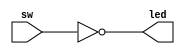

In [ ]:
`timescale 1ns / 1ps 

///////
module min_sec(output reg [3:0]min_ones,output reg [2:0]min_tens,output reg [3:0]sec_ones,output reg [3:0]sec_tens,input clk_1hz,input reset);

  always @(posedge clk_1hz or posedge reset) begin
    if (reset) begin
       min_ones <= 4'd0;
       min_tens <= 4'd0;
       sec_ones <= 4'd0;
       sec_tens <= 4'd0;
    end 
    else if (sec_ones != 4'd9) begin
    sec_ones <= sec_ones + 1'd1;
end
else begin
    sec_ones <= 4'd0; // Reset sec_ones properly
    if (sec_tens != 3'd5) // sec_tens should count up to 5 (0-5 for 60 seconds)
        sec_tens <= sec_tens + 1'd1;
    else begin
        sec_ones <= 4'd0;
        sec_tens <= 3'd0;
        if (min_ones != 4'd9)
            min_ones <= min_ones + 1'd1;
        else begin
            min_ones <= 4'd0;
            if (min_tens != 3'd5) // min_tens should count up to 5 (0-5 for 60 minutes)
                min_tens <= min_tens + 1'd1;
            else
                min_tens <= 3'd0;
        end
    end
end
  end
endmodule
///////

///////
module ssd(output reg[7:0]seg,output reg[3:0]an,input btnR,input clk);
  reg[1:0]count; wire clk_100hz; wire clk_1hz;
  wire [3:0]min_ones; wire [3:0]sec_ones; wire [2:0]min_tens; wire [2:0]sec_tens;

  clk_100hz c0(.clk_100out(clk_100hz),.clk_in(clk),.reset(btnR));
  clk_1hz c1(.clk_1out(clk_1hz),.clk_in(clk),.reset(btnR));
  min_sec time_data(.min_ones(min_ones),.min_tens(min_tens),.sec_ones(sec_ones),.sec_tens(sec_tens),.clk_1hz(clk_1hz), .reset(btnR));
  

  always @(posedge clk_100hz or posedge btnR) begin
    if (btnR)
        count <= 2'b00;
    else if (count != 2'b11)
        count <= count + 1'b1;
    else
        count <= 2'b00;
  end

  always@(count) begin case(count) 
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end
  
  always @*
    case(count)
        2'b00 : begin       
                case(sec_ones)
                    4'b0000 : seg = get_segment(4'b0000);
                    4'b0001 : seg = get_segment(4'b0001);
                    4'b0010 : seg = get_segment(4'b0010);
                    4'b0011 : seg = get_segment(4'b0011);
                    4'b0100 : seg = get_segment(4'b0100);
                    4'b0101 : seg = get_segment(4'b0101);
                    4'b0110 : seg = get_segment(4'b0110);
                    4'b0111 : seg = get_segment(4'b0111);
                    4'b1000 : seg = get_segment(4'b1000);
                    4'b1001 : seg = get_segment(4'b1001);
                endcase
                end
                
        2'b01 : begin       
                case(sec_tens)
                    4'b0000 : seg = get_segment(4'b0000);
                    4'b0001 : seg = get_segment(4'b0001);
                    4'b0010 : seg = get_segment(4'b0010);
                    4'b0011 : seg = get_segment(4'b0011);
                    4'b0100 : seg = get_segment(4'b0100);
                    4'b0101 : seg = get_segment(4'b0101);
                endcase
                end
                
         2'b10 : begin       
                case(min_ones)
                    4'b0000 : seg = get_segment(4'b0000);
                    4'b0001 : seg = get_segment(4'b0001);
                    4'b0010 : seg = get_segment(4'b0010);
                    4'b0011 : seg = get_segment(4'b0011);
                    4'b0100 : seg = get_segment(4'b0100);
                    4'b0101 : seg = get_segment(4'b0101);
                    4'b0110 : seg = get_segment(4'b0110);
                    4'b0111 : seg = get_segment(4'b0111);
                    4'b1000 : seg = get_segment(4'b1000);
                    4'b1001 : seg = get_segment(4'b1001);
                endcase
                end
                
         2'b11 : begin       
                case(min_tens)
                    4'b0000 : seg = get_segment(4'b0000);
                    4'b0001 : seg = get_segment(4'b0001);
                    4'b0010 : seg = get_segment(4'b0010);
                    4'b0011 : seg = get_segment(4'b0011);
                    4'b0100 : seg = get_segment(4'b0100);
                    4'b0101 : seg = get_segment(4'b0101);
                endcase
                end
                
      endcase
         
        
    // Function to map numbers to 7-segment display encoding
  function [7:0] get_segment;
    input [3:0] num;
    begin
      case(num)
        4'b0000: get_segment = 8'b11000000;    // "0"
        4'b0001: get_segment = 8'b11111001;    // "1"
        4'b0010: get_segment = 8'b10100100;    // "2"
        4'b0011: get_segment = 8'b10110000;    // "3"
        4'b0100: get_segment = 8'b10011001;    // "4"
        4'b0101: get_segment = 8'b10010010;    // "5"
        4'b0110: get_segment = 8'b10000010;    // "6"
        4'b0111: get_segment = 8'b11111000;    // "7"
        4'b1000: get_segment = 8'b10000000;    // "8"
        4'b1001: get_segment = 8'b10010000;    // "9"
        default: get_segment = 8'hFF;          // Blank
      endcase
    end
  endfunction
endmodule
///////

///////
module clk_100hz(output reg clk_100out, input clk_in, reset);
  reg [17:0] count;  // 18-bit counter to count up to 250,000

  always @(posedge clk_in or posedge reset) begin
    if (reset) begin
      count <= 18'd0;
      clk_100out <= 1'b0;
    end
    else if (count == 18'd249999) begin
      clk_100out <= ~clk_100out; // Toggle output clock
      count <= 18'd0; // Reset counter
    end
    else begin
      count <= count + 1'b1;
    end
  end
endmodule
///////

///////
module clk_1hz(output reg clk_1out, input clk_in, reset);
  reg [26:0] count;  // 27-bit counter to store up to 100M cycles

  always @(posedge clk_in or posedge reset) begin
    if (reset) begin
      count <= 27'd0;
      clk_1out <= 1'b0;
    end 
    else if (count == 27'd49_999_999) begin  // Toggle at half-cycle (50M counts)
      clk_1out <= ~clk_1out;  // Toggle clock output
      count <= 27'd0;  // Reset counter
    end 
    else begin
      count <= count + 1'b1;
    end
  end
endmodule
///////